# World Religion Data Visualization

The code below performs the preparation of the datasets.

In [403]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import numpy as np

country_codes  = pd.read_csv("datasets/cow-country-codes.csv")
global_stats   = pd.read_csv("datasets/WRP-global-data.csv")
national_stats = pd.read_csv("datasets/WRP-national-data.csv")
regional_stats = pd.read_csv("datasets/WRP-regional-data.csv")

print("Finished loading datasets.")

Finished loading datasets.


## Queries

In [404]:
def cc(country):
    return country_codes.query('StateNme == @country')["StateAbb"].iloc[0]

print(f"Get country code by country name. Example: cc('United States of America').")
cc('United States of America')

Get country code by country name. Example: cc('United States of America').


'USA'

## Tables

First five rows of every dataset.

In [405]:
country_codes.head(6).style

,StateAbb,CCode,StateNme
0,USA,2,United States of America
1,CAN,20,Canada
2,BHM,31,Bahamas
3,CUB,40,Cuba
4,CUB,40,Cuba
5,HAI,41,Haiti


In [406]:
global_stats.head(6).style

,year,chrstprot,chrstcat,chrstorth,chrstang,chrstothr,chrstgen,judorth,jdcons,judref,judothr,judgen,islmsun,islmshi,islmibd,islmnat,islmalw,islmahm,islmothr,islmgen,budmah,budthr,budothr,budgen,zorogen,hindgen,sikhgen,shntgen,bahgen,taogen,jaingen,confgen,syncgen,anmgen,nonrelig,othrgen,sumrelig,pop,worldpop,chrstprotpct,chrstcatpct,chrstorthpct,chrstangpct,chrstothrpct,chrstgenpct,judorthpct,judconspct,judrefpct,judothrpct,judgenpct,islmsunpct,islmshipct,islmibdpct,islmnatpct,islmalwpct,islmahmpct,islmothrpct,islmgenpct,budmahpct,budthrpct,budothrpct,budgenpct,zorogenpct,hindgenpct,sikhgenpct,shntgenpct,bahgenpct,taogenpct,jaingenpct,confgenpct,syncgenpct,anmgenpct,nonreligpct,othrgenpct,sumreligpct,ptctotal,version
0,1945,160887585,391332035,98501171,36955033,13674466,701350290,856827,1426350,1929388,7796835,12009400,49050320,19436742,0,0,0,0,62273219,130760281,0,0,116237936,116237936,12710,5389197,20809,55228775,15495,120950,181,0,428660117,33210080,153486530,9856926,1636502751,1617000000,2250000000,0.100100,0.243400,0.061300,0.023000,0.008500,0.436200,0.000500,0.000900,0.001200,0.004800,0.007500,0.030500,0.012100,0.000000,0,0.000000,0.000000,0.038700,0.081300,0.000000,0.000000,0.072300,0.072300,0.000000,0.003400,0.000000,0.034300,0.000000,0.000100,0.000000,0.000000,0.266600,0.020700,0.095500,0.006100,1.012061,0.718667,1.100000
1,1950,133301043,401935856,106610911,38307544,16324768,696480122,2204231,1860297,2528641,7105125,13698294,56921304,20944082,0,0,387994,0,215867687,294121067,0,14031137,144980765,159011902,119462,301349500,5932557,65452839,638739,921828,1817254,2646410,431942094,88853880,192925316,12145951,2255911264,2231000000,2780296616,0.060000,0.181000,0.048000,0.017300,0.007400,0.313600,0.001000,0.000800,0.001100,0.003200,0.006200,0.025600,0.009400,0.000000,0,0.000200,0.000000,0.097200,0.132500,0.000000,0.006300,0.065300,0.071600,0.000100,0.135700,0.002700,0.029500,0.000300,0.000400,0.000800,0.001200,0.194500,0.040000,0.086900,0.005500,1.011166,0.802432,1.100000
2,1955,189347338,474378130,111661338,38177572,22437724,836002102,2496432,1653007,2225241,6611524,12986204,78882540,24256503,0,0,445582,0,240487382,344072007,0,33522360,145861839,179384199,140762,328704605,6407617,68145114,761302,1182738,1620662,2956319,385702150,93710944,304128449,21379050,2565905174,2536000000,3039433944,0.074700,0.187100,0.044000,0.015100,0.008800,0.329700,0.001000,0.000700,0.000900,0.002600,0.005100,0.031100,0.009600,0.000000,0,0.000200,0.000000,0.094800,0.135700,0.000000,0.013200,0.057500,0.070700,0.000100,0.129600,0.002500,0.026900,0.000300,0.000500,0.000600,0.001200,0.152100,0.037000,0.119900,0.008400,1.011792,0.834366,1.100000
3,1960,220293770,541957872,118268109,41846700,44601144,966967595,2818847,1716903,2300405,6892701,13728856,104325384,27174803,0,0,521848,0,303101053,435123088,0,16766250,183672909,200439159,170443,361169167,8088138,71357167,1278349,1357348,2031760,3593958,325016083,135768801,434629671,18904435,2960719583,2921000000,3345409879,0.075400,0.185600,0.040500,0.014300,0.015300,0.331100,0.001000,0.000600,0.000800,0.002400,0.004700,0.035700,0.009300,0.000000,0,0.000200,0.000000,0.103800,0.149000,0.000000,0.005700,0.062900,0.068600,0.000100,0.123700,0.002800,0.024400,0.000400,0.000500,0.000700,0.001200,0.111300,0.046500,0.148800,0.006500,1.013598,0.873137,1.100000
4,1965,234437703,614115021,125954494,45086639,55119929,1074713786,3295632,1760345,2348076,6849626,14253679,129192812,17097714,40000,0,598115,0,367705416,514634057,0,18305680,194287704,212593384,148944,397863182,8895685,74982591,1658891,1704647,2341748,4441376,358844822,160893706,474097850,41159669,3302068346,3280000000,3706601448,0.071500,0.187300,0.038400,0.013700,0.016800,0.327700,0.001000,0.000500,0.000700,0.002100,0.004300,0.039400,0.005200,0.000000,0,0.000200,0.000000,0.112100,0.156900,0.000000,0.005600,0.059200,0.064800,0.000000,0.121300,0.002700,0.022900,0.000500,0.000500,0.000700,0.001400,0.109400,0.049100,0.144600,0.012600,1.006728,0.884908,1.100000
5

In [407]:
national_stats.head(6).style

,year,state,name,chrstprot,chrstcat,chrstorth,chrstang,chrstothr,chrstgen,judorth,jdcons,judref,judothr,judgen,islmsun,islmshi,islmibd,islmnat,islmalw,islmahm,islmothr,islmgen,budmah,budthr,budothr,budgen,zorogen,hindgen,sikhgen,shntgen,bahgen,taogen,jaingen,confgen,syncgen,anmgen,nonrelig,othrgen,sumrelig,pop,chrstprotpct,chrstcatpct,chrstorthpct,chrstangpct,chrstothrpct,chrstgenpct,judorthpct,judconspct,judrefpct,judothrpct,judgenpct,islmsunpct,islmshipct,islmibdpct,islmnatpct,islmalwpct,islmahmpct,islmothrpct,islmgenpct,budmahpct,budthrpct,budothrpct,budgenpct,zorogenpct,hindgenpct,sikhgenpct,shntgenpct,bahgenpct,taogenpct,jaingenpct,confgenpct,syncgenpct,anmgenpct,nonreligpct,othrgenpct,sumreligpct,total,dualrelig,datatype,sourcereliab,recreliab,reliabilevel,Version,sourcecode
0,1945,2,USA,66069671,38716742,1121898,2400000,1956807,110265118,821489,1364508,1902885.000000,552300,4641182,0,0,0,0,0,0,0.000000,0,0,0,1601218,1601218,0,0,0,0,0,0,0,0,0,0,22874544,545938,139382062,139928000,0.472200,0.276700,0.008000,0.017200,0.014000,0.788000,0.005900,0.009800,0.013600,0.003900,0.033200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011400,0.011400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163500,0.003900,0.996100,1.000000,0,34,2,10,Medium,1.100000,13
1,1950,2,USA,73090083,42635882,3045420,3045420,1177214,122994019,1078078,1790706,2497244.000000,724809,6090837,0,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22568130,618022,151652986,152271008,0.480000,0.280000,0.020000,0.020000,0.007700,0.807700,0.007100,0.011800,0.016400,0.004800,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148200,0.004100,0.995900,1.000000,0,34,6,28,Low,1.100000,18
2,1955,2,USA,79294628,46402368,3454916,2572767,2277091,134001770,944000,1568000,2186666.000000,634666,5333332,0,0,0,0,0,0,0.000000,0,0,0,90173,90173,0,0,0,0,0,0,0,0,0,0,23303540,3202185,162728815,165931000,0.477900,0.279600,0.020800,0.015500,0.013700,0.807600,0.005700,0.009400,0.013200,0.003800,0.032100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.000500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140400,0.019300,0.980700,0.999900,0,134,5,10,Medium,1.100000,15
3,1960,2,USA,90692928,50587880,3334535,2710065,2908939,150234347,973500,1617000,2255000.000000,654500,5500000,0,0,0,0,0,0,0.000000,0,0,0,2012131,2012131,0,0,0,0,0,0,0,0,0,0,21548225,1376297,179294703,180671000,0.502000,0.280000,0.018500,0.015000,0.016100,0.831500,0.005400,0.008900,0.012500,0.003600,0.030400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011100,0.011100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119300,0.007600,0.992400,0.999900,0,134,2,10,Medium,1.100000,13
4,1965,2,USA,94165803,64761783,4792868,2822149,973155,167515758,991200,1646400,2296000.000000,666400,5600000,0,0,0,0,0,0,0.000000,0,0,0,1080892,1080892,0,0,0,0,0,0,0,0,0,0,19852362,581988,194049012,194631000,0.483800,0.332700,0.024600,0.014500,0.005000,0.860700,0.005100,0.008500,0.011800,0.003400,0.028800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005600,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102000,0.003000,0.997000,1.000100,0,134,8,28,Low,1.100000,20
5,1970,2,USA,93918347,69119143,5498914,3030647,1300000,172867051,1088550,1808100,2521500.000000,731850,6150000,0,0,0,0,0,0,0.000000,0,0,0,1113861,1113861,0,0,0,0,90247,0,0,0,0,0,20474592,10249,200695751,200706000,0.467900,0.344400,0.027400,0.015100,0.006500,0.861300,0.005400,0.009000,0.012600,0.003600,0.030600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [408]:
regional_stats.head(6).style

,year,region,chrstprot,chrstcat,chrstorth,chrstang,chrstothr,chrstgen,judorth,jdcons,judref,judothr,judgen,islmsun,islmshi,islmibd,islmnat,islmalw,islmahm,islmothr,islmgen,budmah,budthr,budothr,budgen,zorogen,hindgen,sikhgen,shntgen,bahgen,taogen,jaingen,confgen,syncgen,anmgen,nonrelig,othrgen,sumrelig,pop,worldpop,chrstprotpct,chrstcatpct,chrstorthpct,chrstangpct,chrstothrpct,chrstgenpct,judorthpct,judconspct,judrefpct,judothrpct,judgenpct,islmsunpct,islmshipct,islmibdpct,islmnatpct,islmalwpct,islmahmpct,islmothrpct,islmgenpct,budmahpct,budthrpct,budothrpct,budgenpct,zorogenpct,hindgenpct,sikhgenpct,shntgenpct,bahgenpct,taogenpct,jaingenpct,confgenpct,syncgenpct,anmgenpct,nonreligpct,othrgenpct,sumreligpct,totalpct,totregpct,version
0,1945,Africa,2074180,672337,7251492,419457,4170594,14588060,0,0,0,80487,80487,0,0,0,0,0,0,5051475,5051475,0,0,53,53,0,137290,1536,0,2021,0,0,0,831,9162018,7396,41833,29065604,29073000,1617000000,0.071300,0.023100,0.249400,0.014400,0.143500,0.501800,0.000000,0.000000,0.000000,0.002800,0.002800,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.173800,0.173800,0.000000,0.000000,0.000000,0.000000,0.000000,0.004700,0.000100,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.315100,0.000300,0.001400,0.999700,1.000000,0.018000,1.100000
1,1945,Asia,2407144,2222908,181928,3142204,1964907,9919091,0,0,0,30369,30369,7451998,940000,0,0,0,0,27868347,36260345,0,0,113681431,113681431,2710,5230216,12525,55228775,7243,120950,0,0,423153390,22525760,30637661,152491,666325296,663450000,1617000000,0.003600,0.003400,0.000300,0.004700,0.003000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011200,0.001400,0.000000,0,0.000000,0.000000,0.042000,0.054700,0.000000,0.000000,0.171300,0.171300,0.000000,0.007900,0.000000,0.083200,0.000000,0.000200,0.000000,0.000000,0.637800,0.034000,0.046200,0.000200,1.004300,1.050500,0.410300,1.100000
2,1945,Europe,83145512,216041422,86503645,29855595,5361826,420908000,0,0,0,6068020,6068020,0,0,0,0,0,0,29353397,29353397,0,0,725632,725632,0,21691,1748,0,6231,0,181,0,5896,1294177,99829250,2535777,460920750,560750000,1617000000,0.148300,0.385300,0.154300,0.053200,0.009600,0.750600,0.000000,0.000000,0.000000,0.010800,0.010800,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.052300,0.052300,0.000000,0.000000,0.001300,0.001300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002300,0.178000,0.004500,0.822000,1.000000,0.346800,1.100000
3,1945,Mideast,87174,635929,3180260,0,108332,4011695,0,0,0,623240,623240,41598322,18496742,0,0,0,0,0,60095064,0,0,0,0,10000,0,0,0,0,0,0,0,0,0,561,478440,65218439,65219000,1617000000,0.001300,0.009800,0.048800,0.000000,0.001700,0.061500,0.000000,0.000000,0.000000,0.009600,0.009600,0.637800,0.283600,0.000000,0,0.000000,0.000000,0.000000,0.921400,0.000000,0.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007300,1.000000,1.000000,0.040300,1.100000
4,1945,West. Hem,73173575,171759439,1383846,3537777,2068807,251923444,856827,1426350,1929388,994719,5207284,0,0,0,0,0,0,0,0,0,0,1830820,1830820,0,0,5000,0,0,0,0,0,5500000,228125,23011662,6648385,271343058,289375655,1617000000,0.252900,0.593600,0.004800,0.012200,0.007100,0.870600,0.003000,0.004900,0.006700,0.003400,0.018000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006300,0.006300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019000,0.000800,0.079500,0.023000,0.937700,1.017200,0.179000,1.100000
5,1950,Africa,3302860,736193,7260770,609769,4884121,16793713,0,0,0,97006,97006,0,0,0,0,0,0,5508523,5508523,0,0,194,194,0,195524,1943,0,3004,0,0,0,973,11084152,19918,2050,33687082,33707000,2231000000,0.098000,0.021800,0.215400,0.018100,0.144900,0.498200,0.000000,0.000000,0.000000,0.002900,0.002900,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.163400,0.163400,0.000000,0.000000,0.000000,0.000000,0.000000,0.005800,0.000100,0.000000,0.000100,0.000000

## Plots

Distribitions of all religions.

In [409]:
global_all_combine = pd.DataFrame(global_stats,columns=["year","chrstprot","chrstcat","chrstorth","chrstang","chrstothr","chrstgen","judorth","jdcons","judref","judothr","judgen","islmsun","islmshi","islmibd","islmnat","islmalw","islmahm","islmothr","islmgen","budmah","budthr","budothr","budgen","zorogen","hindgen","sikhgen","shntgen","bahgen","taogen","jaingen","confgen","syncgen","anmgen","nonrelig","othrgen","worldpop"])
global_all_christianity = pd.Series(global_stats.iloc[13],index=["chrstprot","chrstcat","chrstorth","chrstang","chrstothr"],name="Distribution of Christianity in 2010")
global_all_judaism = pd.Series(global_stats.iloc[13],index=["judorth","jdcons","judref","judothr"],name="Distribution of Judaism in 2010")
global_all_islam = pd.Series(global_stats.iloc[13],index=["islmsun","islmshi","islmibd","islmnat","islmalw","islmahm","islmothr"],name="Distribution of Islam in 2010")
global_all_buddhism = pd.Series(global_stats.iloc[13],index=["budmah","budthr","budothr"],name="Distribution of Buddhism in 2010")
cols_to_sum = pd.Series(global_stats.iloc[13],index=["zorogen","hindgen","sikhgen","shntgen","bahgen","taogen","jaingen","confgen","syncgen","anmgen"]).sum()
global_all_general = pd.Series(global_stats.iloc[13],index=["chrstgen","judgen","islmgen","budgen","nonrelig","othrgen","misc"],name="Distribution of Major religions in 2010").replace(to_replace=np.nan, value=cols_to_sum)
print("Finished generating distribution charts.")

Finished generating distribution charts.


### Distribution of Christianity in 2010

array([<AxesSubplot:ylabel='Distribution of Christianity in 2010'>],
      dtype=object)

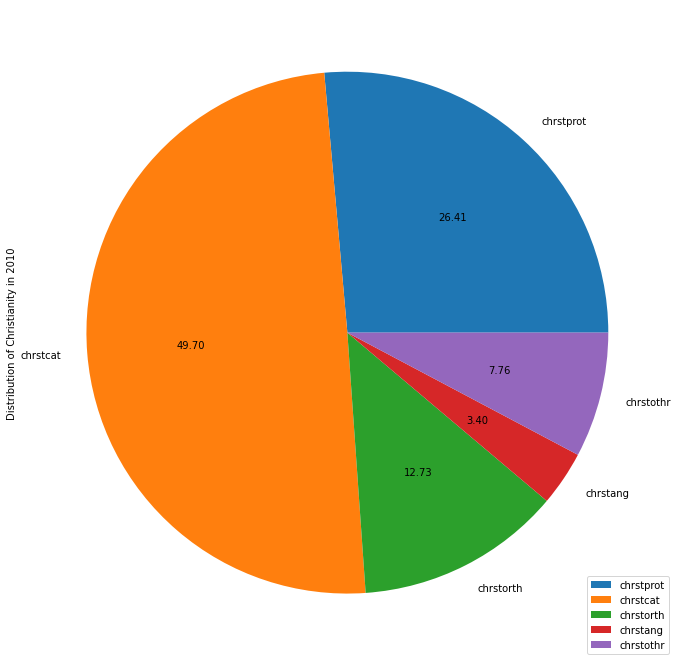

In [410]:
global_all_christianity.plot.pie(subplots=True,figsize=(12,12),autopct="%.2F",legend=True)

### Distribution of Judaism in 2010

array([<AxesSubplot:ylabel='Distribution of Judaism in 2010'>],
      dtype=object)

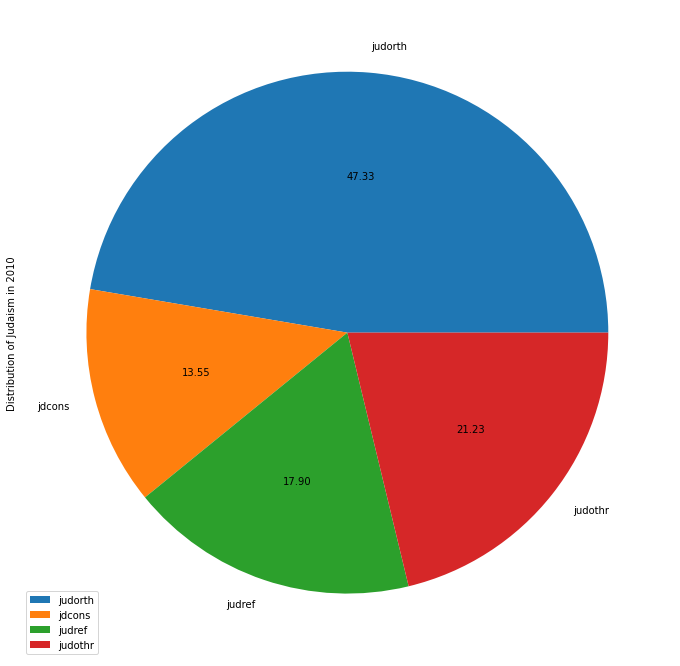

In [411]:
global_all_judaism.plot.pie(subplots=True,figsize=(12,12),autopct="%.2F",legend=True)

### Distribution of Islam in 2010

array([<AxesSubplot:ylabel='Distribution of Islam in 2010'>], dtype=object)

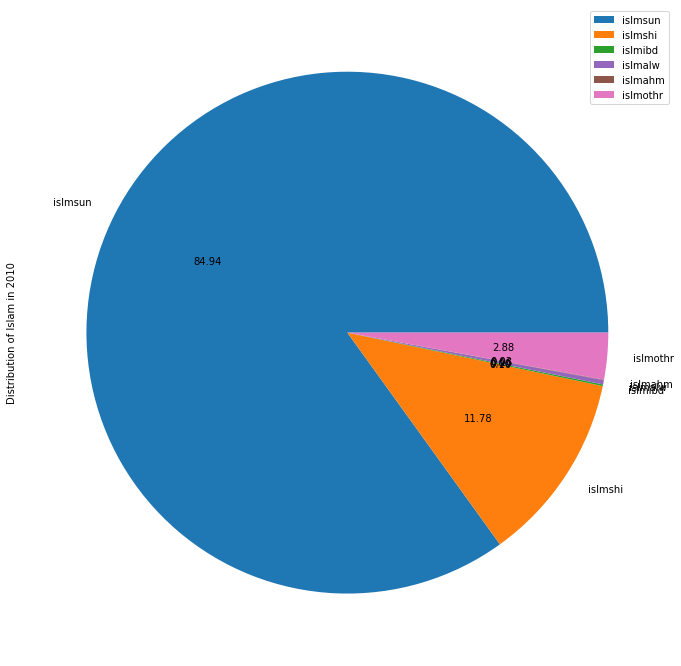

In [412]:
global_all_islam.plot.pie(subplots=True,figsize=(12,12),autopct="%.2F",legend=True)

### Distribution of Buddhism in 2010

array([<AxesSubplot:ylabel='Distribution of Buddhism in 2010'>],
      dtype=object)

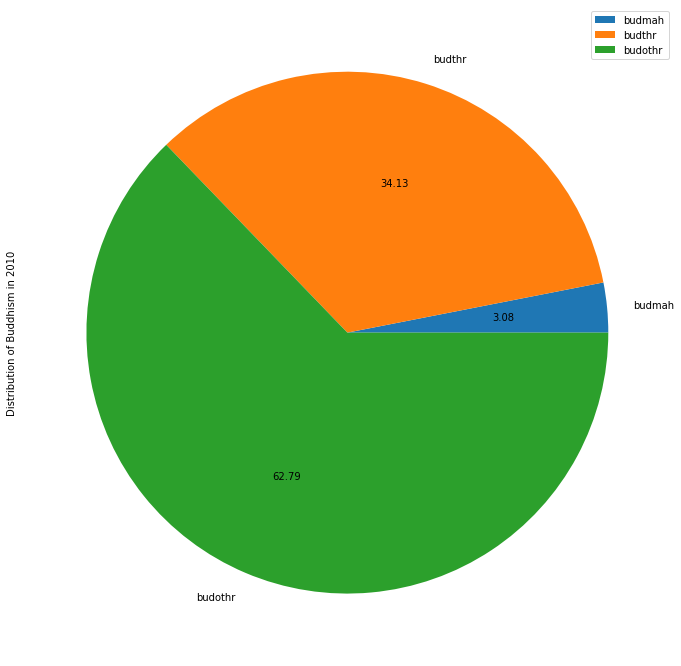

In [413]:
global_all_buddhism.plot.pie(subplots=True,figsize=(12,12),autopct="%.2F",legend=True)

### Global distribution of religious beliefs in 2010

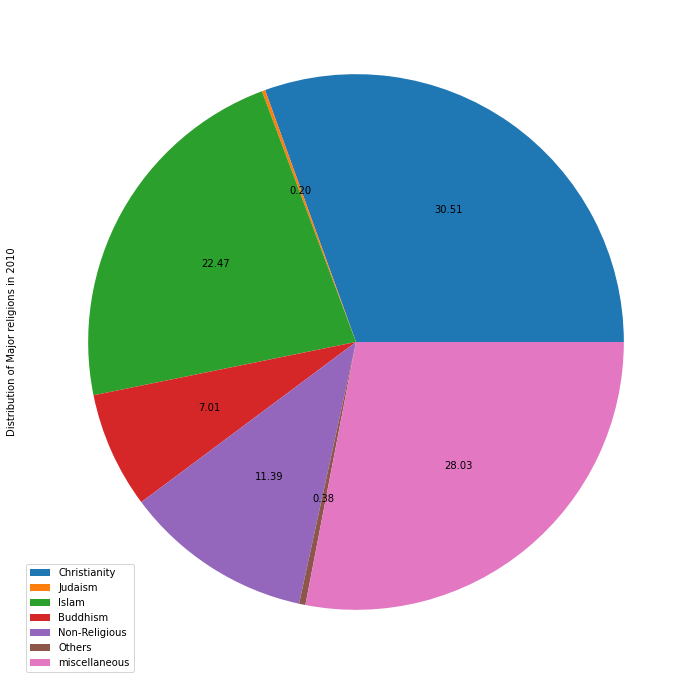

In [414]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 16)
global_all_general.plot.pie(subplots=True,autopct="%.2F",ax=ax,labels=None)
ax.legend(["Christianity", "Judaism", "Islam", "Buddhism", "Non-Religious", "Others", "miscellaneous"])